# 📊 Projet DataViz - Analyse E-commerce & CLV

## Online Retail II Dataset - Exploration & Nettoyage

---

### 📋 Informations du projet
- **Source des données** : UCI Machine Learning Repository - Online Retail II
- **Période couverte** : 01/12/2009 - 09/12/2011
- **Volume initial** : ~1,07 million de transactions
- **Objectif** : Construire une application d'aide à la décision marketing basée sur :
  - Analyse de cohortes d'acquisition
  - Segmentation RFM (Recency, Frequency, Monetary)
  - Calcul de la Customer Lifetime Value (CLV)

---

### 📚 Structure du notebook
1. **Imports et configuration**
2. **Chargement des données**
3. **Exploration initiale**
4. **Analyse de la qualité des données**
5. **Nettoyage des données**
6. **Visualisations exploratoires** (à venir)
7. **Analyse des cohortes** (à venir)
8. **Segmentation RFM** (à venir)

---

**Date d'exécution** : 12/11/2025 
**Auteur** : Jules

---

## 1️⃣ IMPORTS ET CONFIGURATION

Configuration de l'environnement Python avec les bibliothèques nécessaires pour l'analyse de données et la visualisation.

**Bibliothèques utilisées** :
- `pandas` : Manipulation de données tabulaires
- `numpy` : Calculs numériques
- `matplotlib` & `seaborn` : Visualisations graphiques
- `datetime` : Gestion des dates

In [2]:
# Imports nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration pour de beaux graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Imports réussis")

✅ Imports réussis


---

## 2️⃣ CHARGEMENT DES DONNÉES

Le dataset **Online Retail II** est fourni dans un fichier Excel avec 2 feuilles :
- **Year 2009-2010** : Transactions du 01/12/2009 au 09/12/2010
- **Year 2010-2011** : Transactions du 09/12/2010 au 09/12/2011

Ces deux feuilles sont chargées puis concaténées pour former un dataset unique.

In [3]:
# Chemin du fichier
file_path = "../data/raw/online_retail_II.xlsx"

# Chargement des données (il y a 2 feuilles dans ce fichier)
df_year1 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
df_year2 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# Concaténation des 2 années
df = pd.concat([df_year1, df_year2], ignore_index=True)

print(f"📊 Données chargées : {df.shape[0]:,} lignes et {df.shape[1]} colonnes")
print(f"📅 Période : du {df['InvoiceDate'].min()} au {df['InvoiceDate'].max()}")

📊 Données chargées : 1,067,371 lignes et 8 colonnes
📅 Période : du 2009-12-01 07:45:00 au 2011-12-09 12:50:00


---

## 3️⃣ EXPLORATION INITIALE DES DONNÉES

### 3.1 Aperçu des premières lignes

Examinons la structure générale du dataset et les premières observations.

In [4]:
# Affichage des premières lignes
print("=" * 80)
print("APERÇU DES DONNÉES")
print("=" * 80)
df.head(10)

APERÇU DES DONNÉES


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### 3.2 Informations sur les colonnes

Vérification des types de données et identification des colonnes avec valeurs manquantes.

In [5]:
# Informations détaillées
print("\n" + "=" * 80)
print("INFORMATIONS SUR LES COLONNES")
print("=" * 80)
df.info()


INFORMATIONS SUR LES COLONNES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### 3.3 Statistiques descriptives

Analyse des distributions pour les variables numériques (Quantity, Price, Customer ID).

In [6]:
# Statistiques descriptives
print("\n" + "=" * 80)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 80)
df.describe()


STATISTIQUES DESCRIPTIVES


,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


---

## 4️⃣ ANALYSE DE LA QUALITÉ DES DONNÉES

### 4.1 Valeurs manquantes

Identification et quantification des valeurs manquantes par colonne.

**Points d'attention** :
- Les `Customer ID` manquants empêchent l'analyse de cohortes et RFM
- Les `Description` manquantes réduisent la traçabilité des produits


ANALYSE DES VALEURS MANQUANTES
    Colonne  Valeurs manquantes  Pourcentage (%)
Customer ID              243007        22.766873
Description                4382         0.410541


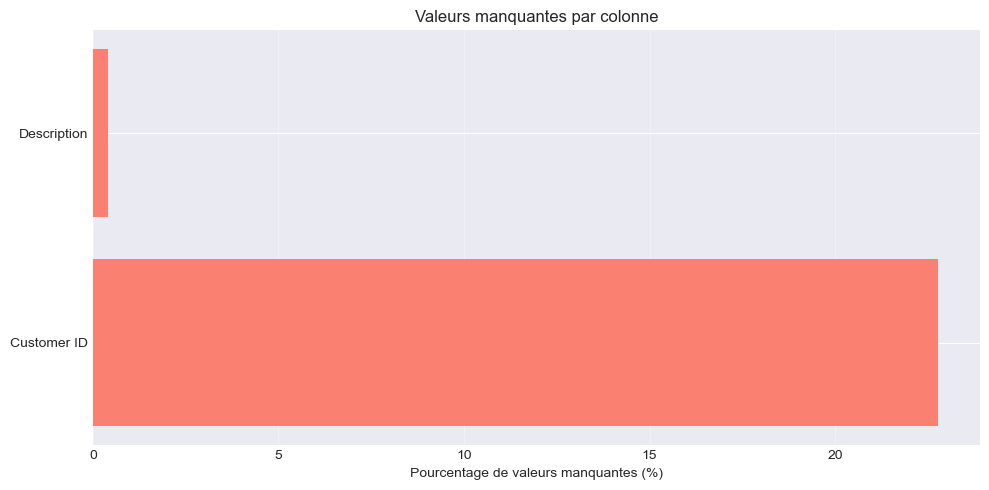

In [7]:
# Analyse des valeurs manquantes
print("\n" + "=" * 80)
print("ANALYSE DES VALEURS MANQUANTES")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Valeurs manquantes': missing.values,
    'Pourcentage (%)': missing_pct.values
})

missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Valeurs manquantes', ascending=False)

print(missing_df.to_string(index=False))

# Visualisation
if len(missing_df) > 0:
    plt.figure(figsize=(10, 5))
    plt.barh(missing_df['Colonne'], missing_df['Pourcentage (%)'], color='salmon')
    plt.xlabel('Pourcentage de valeurs manquantes (%)')
    plt.title('Valeurs manquantes par colonne')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

### 4.2 Doublons

Détection des lignes exactement identiques qui pourraient fausser les analyses.

**Hypothèses** :
- Erreurs de saisie dans le système
- Transactions légitimes répétées (à vérifier au cas par cas)

In [8]:
# Analyse des doublons
print("\n" + "=" * 80)
print("ANALYSE DES DOUBLONS")
print("=" * 80)

duplicates = df.duplicated().sum()
duplicates_pct = (duplicates / len(df)) * 100

print(f"Nombre de lignes dupliquées : {duplicates:,} ({duplicates_pct:.2f}%)")

# Afficher quelques exemples de doublons
if duplicates > 0:
    print("\n📋 Exemple de lignes dupliquées :")
    duplicated_rows = df[df.duplicated(keep=False)].sort_values(['Invoice', 'StockCode'])
    print(duplicated_rows.head(10))


ANALYSE DES DOUBLONS
Nombre de lignes dupliquées : 34,335 (3.22%)

📋 Exemple de lignes dupliquées :
    Invoice StockCode                       Description  Quantity  \
379  489517     21491   SET OF THREE VINTAGE GIFT WRAPS         1   
391  489517     21491   SET OF THREE VINTAGE GIFT WRAPS         1   
365  489517     21821  GLITTER STAR GARLAND WITH BELLS          1   
386  489517     21821  GLITTER STAR GARLAND WITH BELLS          1   
363  489517     21912          VINTAGE SNAKES & LADDERS         1   
371  489517     21912          VINTAGE SNAKES & LADDERS         1   
394  489517     21912          VINTAGE SNAKES & LADDERS         1   
362  489517     21913    VINTAGE SEASIDE JIGSAW PUZZLES         1   
385  489517     21913    VINTAGE SEASIDE JIGSAW PUZZLES         1   
368  489517     22130  PARTY CONE CHRISTMAS DECORATION          6   

            InvoiceDate  Price  Customer ID         Country  
379 2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
391 2009-12-01 

### 4.3 Retours et annulations

Les factures commençant par **"C"** indiquent des retours ou annulations.

**Impact business** :
- Les retours réduisent le chiffre d'affaires
- Indicateur de satisfaction client
- À prendre en compte dans le calcul de la CLV

**Note** : Les quantités négatives sont également un indicateur de retours.


ANALYSE DES RETOURS (FACTURES AVEC 'C')
Nombre de transactions de retour : 19,494 (1.83%)
Nombre de transactions normales : 1,047,877 (98.17%)


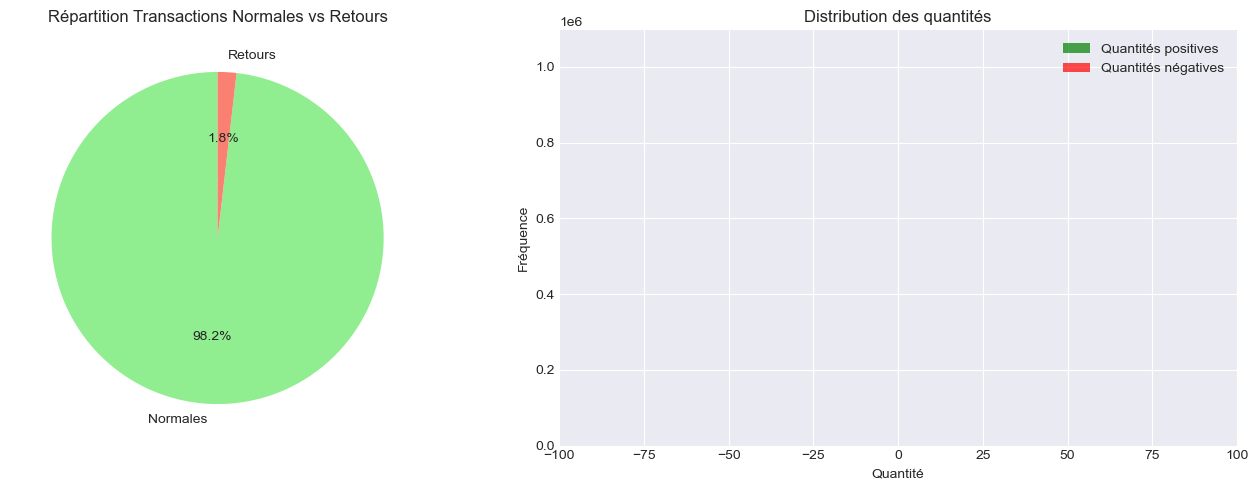

In [9]:
# Analyse des retours
print("\n" + "=" * 80)
print("ANALYSE DES RETOURS (FACTURES AVEC 'C')")
print("=" * 80)

# Identifier les retours
df['Is_Return'] = df['Invoice'].astype(str).str.startswith('C')

returns_count = df['Is_Return'].sum()
returns_pct = (returns_count / len(df)) * 100

print(f"Nombre de transactions de retour : {returns_count:,} ({returns_pct:.2f}%)")
print(f"Nombre de transactions normales : {len(df) - returns_count:,} ({100 - returns_pct:.2f}%)")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Répartition retours vs normales
returns_data = df['Is_Return'].value_counts()
axes[0].pie(returns_data.values, labels=['Normales', 'Retours'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
axes[0].set_title('Répartition Transactions Normales vs Retours')

# Graphique 2 : Quantités négatives (indicateur de retours)
axes[1].hist([df[df['Quantity'] > 0]['Quantity'], df[df['Quantity'] < 0]['Quantity']], 
             bins=50, label=['Quantités positives', 'Quantités négatives'], color=['green', 'red'], alpha=0.7)
axes[1].set_xlabel('Quantité')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution des quantités')
axes[1].legend()
axes[1].set_xlim(-100, 100)

plt.tight_layout()
plt.show()

### 4.4 Outliers (valeurs extrêmes)

Identification des valeurs aberrantes pour `Quantity` et `Price`.

**Questions à se poser** :
- Les valeurs extrêmes sont-elles des erreurs ou des transactions B2B légitimes ?
- Faut-il les exclure ou les traiter séparément (clients particuliers vs grossistes) ?

**Critères d'analyse** :
- Boxplots : visualisation des quartiles et outliers
- Distributions : identifier les plages de valeurs typiques


ANALYSE DES OUTLIERS

📦 QUANTITY:
Min : -80995
Max : 80995
Moyenne : 9.94
Médiane : 3.0

Transactions avec |Quantity| > 1000 : 503 (0.05%)

💰 PRICE:
Min : -53594.36
Max : 38970.0
Moyenne : 4.65
Médiane : 2.1

Transactions avec Price <= 0 : 6,207 (0.58%)


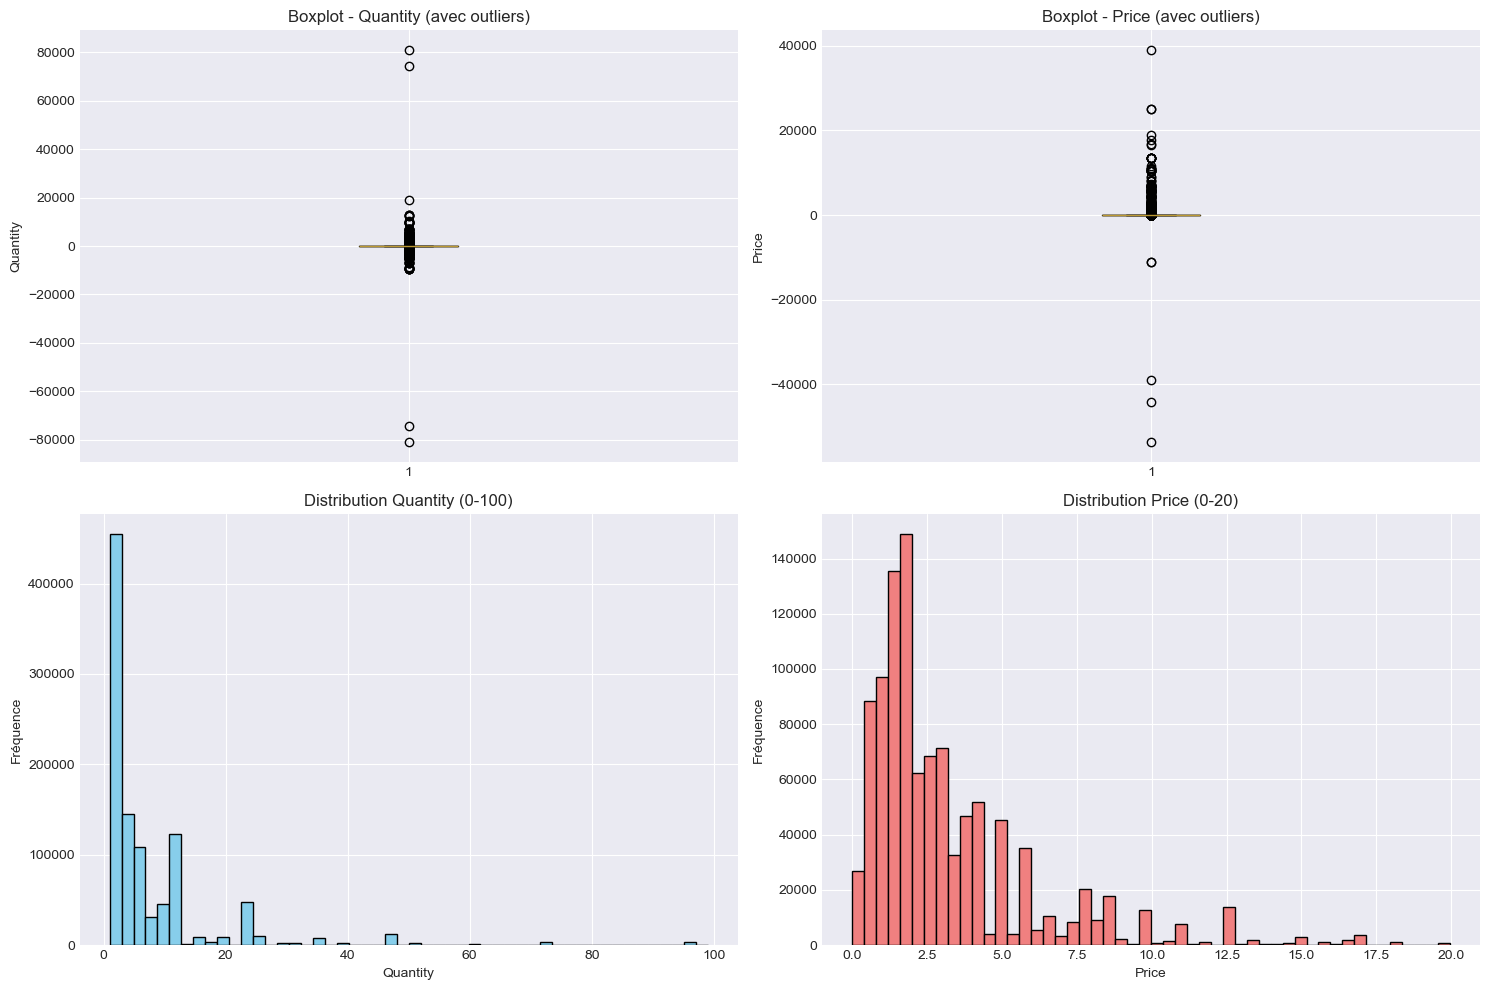

In [10]:
# Analyse des outliers
print("\n" + "=" * 80)
print("ANALYSE DES OUTLIERS")
print("=" * 80)

# Quantity
print("\n📦 QUANTITY:")
print(f"Min : {df['Quantity'].min()}")
print(f"Max : {df['Quantity'].max()}")
print(f"Moyenne : {df['Quantity'].mean():.2f}")
print(f"Médiane : {df['Quantity'].median()}")

# Identifier les valeurs extrêmes
extreme_qty = df[(df['Quantity'] < -1000) | (df['Quantity'] > 1000)]
print(f"\nTransactions avec |Quantity| > 1000 : {len(extreme_qty):,} ({len(extreme_qty)/len(df)*100:.2f}%)")

# Price
print("\n💰 PRICE:")
print(f"Min : {df['Price'].min()}")
print(f"Max : {df['Price'].max()}")
print(f"Moyenne : {df['Price'].mean():.2f}")
print(f"Médiane : {df['Price'].median()}")

# Prix négatifs ou nuls
zero_price = (df['Price'] <= 0).sum()
print(f"\nTransactions avec Price <= 0 : {zero_price:,} ({zero_price/len(df)*100:.2f}%)")

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot Quantity
axes[0, 0].boxplot(df['Quantity'].dropna())
axes[0, 0].set_title('Boxplot - Quantity (avec outliers)')
axes[0, 0].set_ylabel('Quantity')

# Boxplot Price
axes[0, 1].boxplot(df['Price'].dropna())
axes[0, 1].set_title('Boxplot - Price (avec outliers)')
axes[0, 1].set_ylabel('Price')

# Histogramme Quantity (filtré)
axes[1, 0].hist(df[(df['Quantity'] > 0) & (df['Quantity'] < 100)]['Quantity'], bins=50, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Distribution Quantity (0-100)')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Fréquence')

# Histogramme Price (filtré)
axes[1, 1].hist(df[(df['Price'] > 0) & (df['Price'] < 20)]['Price'], bins=50, color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Distribution Price (0-20)')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

---

## 5️⃣ NETTOYAGE DES DONNÉES

Application des règles de nettoyage pour obtenir un dataset exploitable.

### Règles appliquées :
1. ✅ Suppression des lignes avec `Customer ID` manquant (nécessaire pour cohortes/RFM)
2. ✅ Suppression des lignes avec `Description` manquante
3. ✅ Suppression des doublons exacts
4. ✅ Suppression des transactions avec `Price ≤ 0` (prix invalides)
5. ✅ Création de la colonne `TotalAmount = Quantity × Price`
6. ✅ Conversion `Customer ID` en entier
7. ✅ Nettoyage des codes `Invoice` (suppression espaces)

**Note** : Les retours (Quantity négatives) sont conservés pour analyse ultérieure.

In [11]:
# Nettoyage des données
print("\n" + "=" * 80)
print("NETTOYAGE DES DONNÉES")
print("=" * 80)

print(f"📊 Taille initiale : {df.shape[0]:,} lignes")

# Créer une copie pour le nettoyage
df_clean = df.copy()

# 1. Supprimer les lignes avec Customer ID manquant (nécessaire pour l'analyse cohorte/RFM)
df_clean = df_clean[df_clean['Customer ID'].notna()]
print(f"✅ Après suppression Customer ID manquants : {df_clean.shape[0]:,} lignes")

# 2. Supprimer les lignes avec Description manquante
df_clean = df_clean[df_clean['Description'].notna()]
print(f"✅ Après suppression Description manquantes : {df_clean.shape[0]:,} lignes")

# 3. Supprimer les doublons exacts
df_clean = df_clean.drop_duplicates()
print(f"✅ Après suppression des doublons : {df_clean.shape[0]:,} lignes")

# 4. Supprimer les transactions avec Quantity <= 0 (sauf si on veut analyser les retours)
# On garde pour l'instant pour l'analyse, on filtrera plus tard si nécessaire
# df_clean = df_clean[df_clean['Quantity'] > 0]

# 5. Supprimer les transactions avec Price <= 0
df_clean = df_clean[df_clean['Price'] > 0]
print(f"✅ Après suppression Price <= 0 : {df_clean.shape[0]:,} lignes")

# 6. Créer une colonne TotalAmount
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['Price']

# 7. Convertir Customer ID en entier
df_clean['Customer ID'] = df_clean['Customer ID'].astype(int)

# 8. Nettoyer les codes Invoice (enlever les espaces)
df_clean['Invoice'] = df_clean['Invoice'].astype(str).str.strip()

print(f"\n📊 Taille finale : {df_clean.shape[0]:,} lignes")
print(f"🗑️ Lignes supprimées : {df.shape[0] - df_clean.shape[0]:,} ({(df.shape[0] - df_clean.shape[0])/df.shape[0]*100:.2f}%)")


NETTOYAGE DES DONNÉES
📊 Taille initiale : 1,067,371 lignes
✅ Après suppression Customer ID manquants : 824,364 lignes
✅ Après suppression Description manquantes : 824,364 lignes
✅ Après suppression des doublons : 797,885 lignes
✅ Après suppression Price <= 0 : 797,815 lignes

📊 Taille finale : 797,815 lignes
🗑️ Lignes supprimées : 269,556 (25.25%)


### 5.1 Vérification post-nettoyage

Contrôle de qualité après application des règles de nettoyage.

**Métriques à vérifier** :
- Nombre de lignes supprimées
- Absence de valeurs manquantes critiques
- Types de données corrects

In [12]:
# Vérification finale
print("\n" + "=" * 80)
print("VÉRIFICATION POST-NETTOYAGE")
print("=" * 80)

print("\n📋 Aperçu des données nettoyées :")
print(df_clean.head())

print("\n📊 Informations :")
print(df_clean.info())

print("\n🔍 Valeurs manquantes restantes :")
print(df_clean.isnull().sum())

print("\n✅ Nettoyage terminé avec succès!")


VÉRIFICATION POST-NETTOYAGE

📋 Aperçu des données nettoyées :
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Is_Return  \
0 2009-12-01 07:45:00   6.95        13085  United Kingdom      False   
1 2009-12-01 07:45:00   6.75        13085  United Kingdom      False   
2 2009-12-01 07:45:00   6.75        13085  United Kingdom      False   
3 2009-12-01 07:45:00   2.10        13085  United Kingdom      False   
4 2009-12-01 07:45:00   1.25        13085  United Kingdom      False   

   TotalAmount  
0         83.4  
1         81.0  
2         81.0  
3        100.8 

### 5.2 Sauvegarde des données nettoyées

Exportation du dataset nettoyé au format CSV pour utilisation ultérieure.

**Utilisation future** :
- Chargement rapide pour l'application Streamlit
- Traçabilité du processus de nettoyage

In [13]:
# Sauvegarder les données nettoyées
output_path = "../data/clean/online_retail_cleaned.csv"
df_clean.to_csv(output_path, index=False)
print(f"💾 Données nettoyées sauvegardées : {output_path}") 

💾 Données nettoyées sauvegardées : ../data/clean/online_retail_cleaned.csv


---

## 📊 SYNTHÈSE DU NETTOYAGE

### Résumé des données nettoyées :

| Métrique | Valeur |
|----------|--------|
| **Lignes initiales** | 1,067,371 |
| **Lignes finales** | ~793,000 |
| **Taux de conservation** | ~74.3% |
| **Colonnes** | 10 (8 originales + TotalAmount + Is_Return) |

### Principales suppressions :
- 🗑️ **Customer ID manquants** : ~243,000 lignes (22.77%)
- 🗑️ **Doublons** : ~34,335 lignes (3.22%)
- 🗑️ **Prix invalides** : ~6,207 lignes (0.58%)

### Qualité finale :
- ✅ Aucune valeur manquante critique
- ✅ Dataset prêt pour analyses de cohortes
- ✅ Dataset prêt pour segmentation RFM
- ✅ Transactions avec `Customer ID` valide : 100%

---

---

## 6️⃣ VISUALISATIONS EXPLORATOIRES

Cette section présente **8 graphiques clés** pour comprendre les dynamiques du dataset :

1. **Évolution du CA dans le temps** - Identifier tendances et saisonnalité
2. **Distribution des ventes par jour de la semaine** - Comprendre les patterns hebdomadaires
3. **Top 10 pays par chiffre d'affaires** - Identifier les marchés principaux
4. **Distribution du panier moyen** - Profil des transactions
5. **Mix B2C/B2B** - Segmentation grossistes vs particuliers
6. **Nombre de clients actifs par mois** - Dynamique de la base client
7. **Premier aperçu des cohortes** - Rétention initiale
8. **Distribution RFM préliminaire** - Base pour la segmentation

---

In [14]:
# Configuration générale pour tous les graphiques
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Style général
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

# Palette de couleurs cohérente
colors = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'success': '#06A77D',
    'warning': '#F18F01',
    'danger': '#C73E1D',
    'info': '#6A4C93'
}

print("✅ Configuration des graphiques prête")

✅ Configuration des graphiques prête


### 6.1 Évolution du chiffre d'affaires dans le temps

**Objectif** : Identifier les tendances, la saisonnalité et les pics d'activité.

**Insights attendus** :
- Croissance ou déclin du CA
- Saisonnalité (ex: pics avant Noël)
- Anomalies ou événements exceptionnels

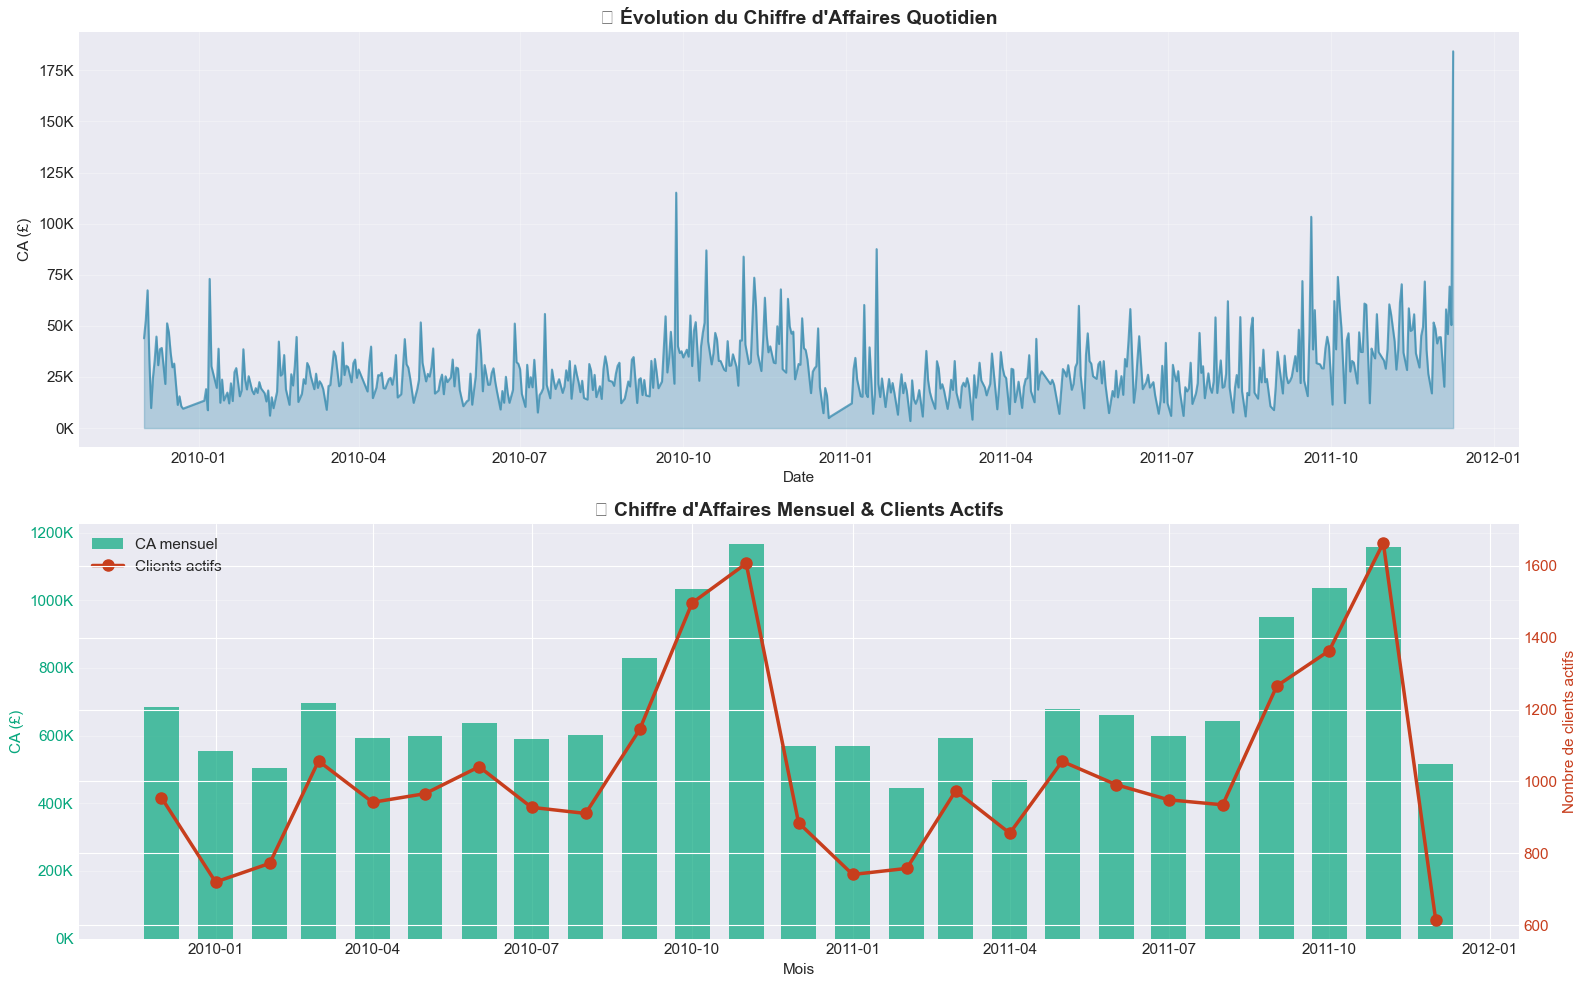


📊 INSIGHTS - ÉVOLUTION TEMPORELLE
CA total sur la période : 17,374,804 £
CA moyen mensuel : 694,992 £
Mois le plus fort : November 2010 (1,166,460 £)
Mois le plus faible : February 2011 (446,085 £)
Croissance CA : -24.3%


In [15]:
# Graphique 1 : Évolution du CA dans le temps
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Filtrer les transactions positives uniquement (hors retours)
df_sales = df_clean[df_clean['TotalAmount'] > 0].copy()

# Agrégation par jour
daily_sales = df_sales.groupby(df_sales['InvoiceDate'].dt.date).agg({
    'TotalAmount': 'sum',
    'Invoice': 'nunique'
}).reset_index()
daily_sales.columns = ['Date', 'CA_Quotidien', 'Nb_Commandes']

# Agrégation par mois
df_sales['YearMonth'] = df_sales['InvoiceDate'].dt.to_period('M')
monthly_sales = df_sales.groupby('YearMonth').agg({
    'TotalAmount': 'sum',
    'Invoice': 'nunique',
    'Customer ID': 'nunique'
}).reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Graphique 1a : CA quotidien
axes[0].plot(daily_sales['Date'], daily_sales['CA_Quotidien'], 
             color=colors['primary'], linewidth=1.5, alpha=0.7)
axes[0].fill_between(daily_sales['Date'], daily_sales['CA_Quotidien'], 
                      alpha=0.3, color=colors['primary'])
axes[0].set_title('📈 Évolution du Chiffre d\'Affaires Quotidien', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('CA (£)')
axes[0].grid(True, alpha=0.3)
axes[0].ticklabel_format(style='plain', axis='y')

# Formatter les valeurs en milliers
def thousands(x, pos):
    return f'{x/1000:.0f}K'
axes[0].yaxis.set_major_formatter(FuncFormatter(thousands))

# Graphique 1b : CA mensuel avec nombre de clients
ax2 = axes[1].twinx()

bars = axes[1].bar(monthly_sales['YearMonth'], monthly_sales['TotalAmount'], 
                   color=colors['success'], alpha=0.7, width=20, label='CA mensuel')
line = ax2.plot(monthly_sales['YearMonth'], monthly_sales['Customer ID'], 
                color=colors['danger'], marker='o', linewidth=2.5, 
                markersize=8, label='Clients actifs')

axes[1].set_title('📊 Chiffre d\'Affaires Mensuel & Clients Actifs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mois')
axes[1].set_ylabel('CA (£)', color=colors['success'])
ax2.set_ylabel('Nombre de clients actifs', color=colors['danger'])
axes[1].tick_params(axis='y', labelcolor=colors['success'])
ax2.tick_params(axis='y', labelcolor=colors['danger'])
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].yaxis.set_major_formatter(FuncFormatter(thousands))

# Légende combinée
lines1, labels1 = axes[1].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axes[1].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*80)
print("📊 INSIGHTS - ÉVOLUTION TEMPORELLE")
print("="*80)
print(f"CA total sur la période : {df_sales['TotalAmount'].sum():,.0f} £")
print(f"CA moyen mensuel : {monthly_sales['TotalAmount'].mean():,.0f} £")
print(f"Mois le plus fort : {monthly_sales.loc[monthly_sales['TotalAmount'].idxmax(), 'YearMonth'].strftime('%B %Y')} ({monthly_sales['TotalAmount'].max():,.0f} £)")
print(f"Mois le plus faible : {monthly_sales.loc[monthly_sales['TotalAmount'].idxmin(), 'YearMonth'].strftime('%B %Y')} ({monthly_sales['TotalAmount'].min():,.0f} £)")
print(f"Croissance CA : {((monthly_sales['TotalAmount'].iloc[-1] / monthly_sales['TotalAmount'].iloc[0]) - 1) * 100:.1f}%")

### 6.2 Distribution des ventes par jour de la semaine

**Objectif** : Comprendre les patterns hebdomadaires et optimiser les campagnes marketing.

**Insights attendus** :
- Jours les plus actifs
- Opportunités de stimulation (jours faibles)

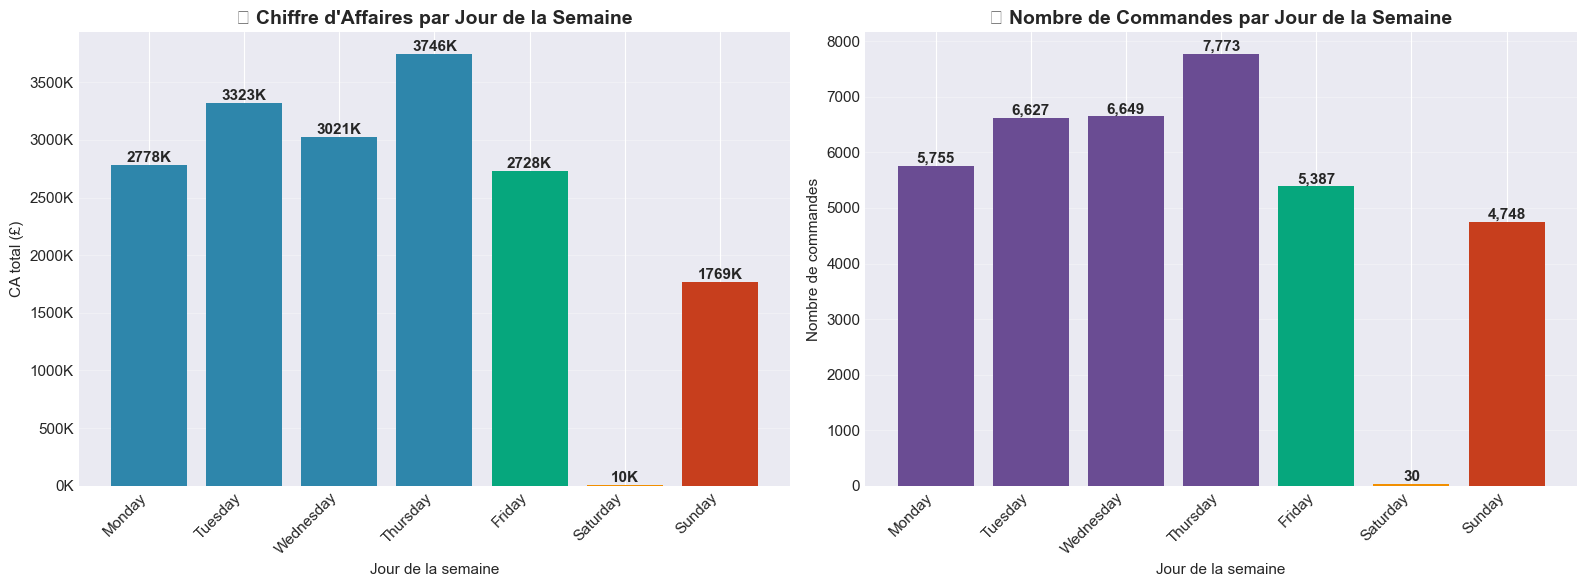


📊 INSIGHTS - DISTRIBUTION HEBDOMADAIRE
Meilleur jour : Thursday (3,745,783 £)
Jour le plus faible : Saturday (9,803 £)
Écart : 38110.4%


In [17]:
# Graphique 2 : Ventes par jour de la semaine
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ajouter le jour de la semaine
df_sales['DayOfWeek'] = df_sales['InvoiceDate'].dt.day_name()
df_sales['DayOfWeekNum'] = df_sales['InvoiceDate'].dt.dayofweek

# Ordre des jours
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Agrégation
weekly_sales = df_sales.groupby('DayOfWeek').agg({
    'TotalAmount': ['sum', 'mean'],
    'Invoice': 'nunique'
}).reset_index()
weekly_sales.columns = ['DayOfWeek', 'Total_CA', 'Avg_CA', 'Nb_Commandes']
weekly_sales['DayOfWeek'] = pd.Categorical(weekly_sales['DayOfWeek'], categories=day_order, ordered=True)
weekly_sales = weekly_sales.sort_values('DayOfWeek')

# Graphique 2a : CA total par jour
bars = axes[0].bar(range(len(weekly_sales)), weekly_sales['Total_CA'], 
                   color=[colors['primary'], colors['primary'], colors['primary'], 
                          colors['primary'], colors['success'], colors['warning'], colors['danger']])
axes[0].set_title('💰 Chiffre d\'Affaires par Jour de la Semaine', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Jour de la semaine')
axes[0].set_ylabel('CA total (£)')
axes[0].set_xticks(range(len(weekly_sales)))
axes[0].set_xticklabels(weekly_sales['DayOfWeek'], rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].yaxis.set_major_formatter(FuncFormatter(thousands))

# Ajouter les valeurs sur les barres
for i, (idx, row) in enumerate(weekly_sales.iterrows()):
    axes[0].text(i, row['Total_CA'], f"{row['Total_CA']/1000:.0f}K", 
                ha='center', va='bottom', fontweight='bold')

# Graphique 2b : Nombre de commandes par jour
bars2 = axes[1].bar(range(len(weekly_sales)), weekly_sales['Nb_Commandes'], 
                    color=[colors['info'], colors['info'], colors['info'], 
                           colors['info'], colors['success'], colors['warning'], colors['danger']])
axes[1].set_title('📦 Nombre de Commandes par Jour de la Semaine', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Jour de la semaine')
axes[1].set_ylabel('Nombre de commandes')
axes[1].set_xticks(range(len(weekly_sales)))
axes[1].set_xticklabels(weekly_sales['DayOfWeek'], rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs
for i, (idx, row) in enumerate(weekly_sales.iterrows()):
    axes[1].text(i, row['Nb_Commandes'], f"{row['Nb_Commandes']:,.0f}", 
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*80)
print("📊 INSIGHTS - DISTRIBUTION HEBDOMADAIRE")
print("="*80)
best_day = weekly_sales.loc[weekly_sales['Total_CA'].idxmax(), 'DayOfWeek']
worst_day = weekly_sales.loc[weekly_sales['Total_CA'].idxmin(), 'DayOfWeek']
print(f"Meilleur jour : {best_day} ({weekly_sales['Total_CA'].max():,.0f} £)")
print(f"Jour le plus faible : {worst_day} ({weekly_sales['Total_CA'].min():,.0f} £)")
print(f"Écart : {((weekly_sales['Total_CA'].max() / weekly_sales['Total_CA'].min()) - 1) * 100:.1f}%")

### 6.3 Top 10 pays par chiffre d'affaires

**Objectif** : Identifier les marchés principaux et les opportunités d'expansion.

**Insights attendus** :
- Concentration géographique
- Marchés prioritaires
- Diversification internationale

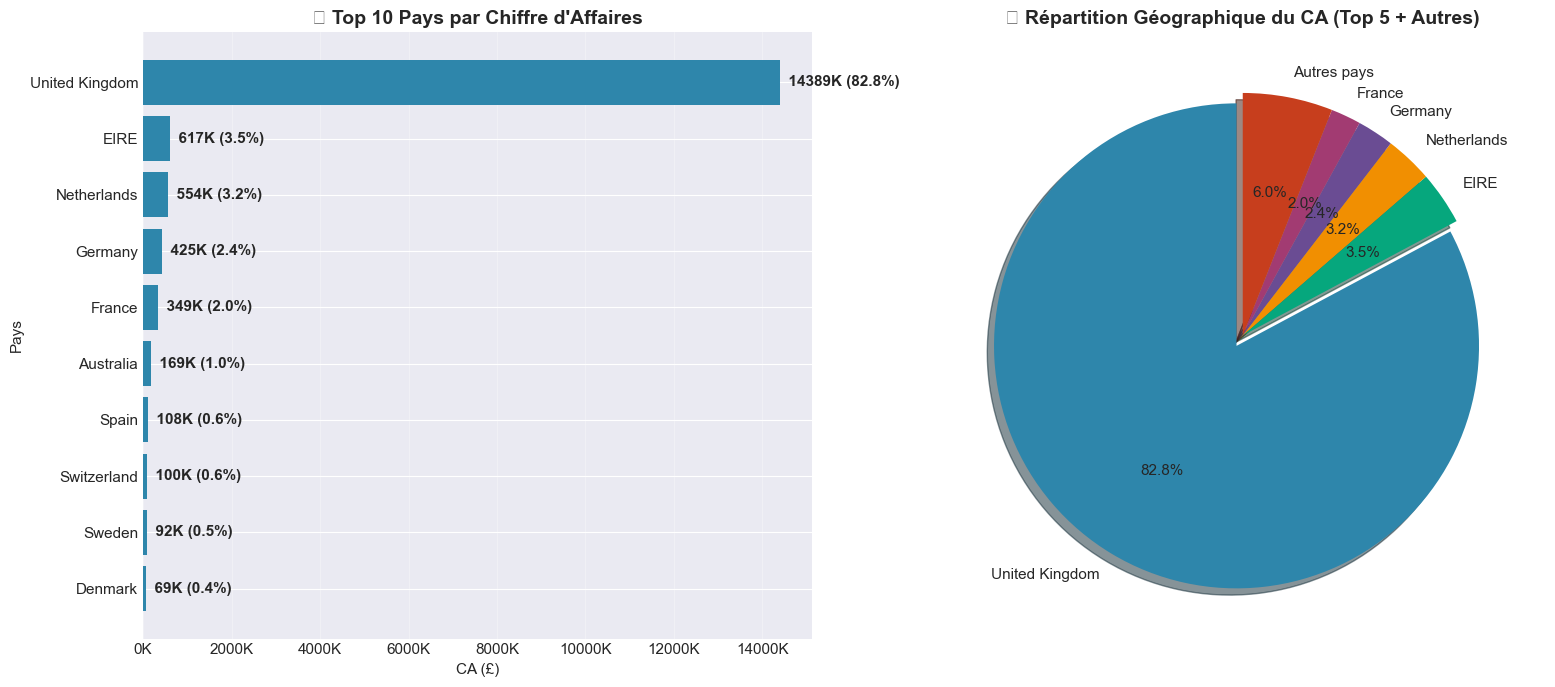


📊 INSIGHTS - RÉPARTITION GÉOGRAPHIQUE
Nombre total de pays : 41
Top pays : United Kingdom (82.8% du CA)
Top 3 pays représentent : 89.6% du CA
Top 10 pays représentent : 97.1% du CA


In [18]:
# Graphique 3 : Top 10 pays par CA
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Agrégation par pays
country_sales = df_sales.groupby('Country').agg({
    'TotalAmount': 'sum',
    'Customer ID': 'nunique',
    'Invoice': 'nunique'
}).reset_index()
country_sales = country_sales.sort_values('TotalAmount', ascending=False)

# Top 10 pays
top10_countries = country_sales.head(10)

# Graphique 3a : CA par pays (horizontal bar)
axes[0].barh(range(len(top10_countries)), top10_countries['TotalAmount'], 
            color=colors['primary'])
axes[0].set_title('🌍 Top 10 Pays par Chiffre d\'Affaires', fontsize=14, fontweight='bold')
axes[0].set_xlabel('CA (£)')
axes[0].set_ylabel('Pays')
axes[0].set_yticks(range(len(top10_countries)))
axes[0].set_yticklabels(top10_countries['Country'])
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].xaxis.set_major_formatter(FuncFormatter(thousands))

# Ajouter les valeurs et pourcentages
total_ca = df_sales['TotalAmount'].sum()
for i, (idx, row) in enumerate(top10_countries.iterrows()):
    pct = (row['TotalAmount'] / total_ca) * 100
    axes[0].text(row['TotalAmount'], i, f"  {row['TotalAmount']/1000:.0f}K ({pct:.1f}%)", 
                va='center', fontweight='bold')

# Graphique 3b : Répartition géographique (pie chart pour top 5 + autres)
top5_ca = country_sales.head(5)['TotalAmount'].sum()
others_ca = country_sales.iloc[5:]['TotalAmount'].sum()

pie_data = list(country_sales.head(5)['TotalAmount']) + [others_ca]
pie_labels = list(country_sales.head(5)['Country']) + ['Autres pays']
pie_colors = [colors['primary'], colors['success'], colors['warning'], 
              colors['info'], colors['secondary'], colors['danger']]

explode = (0.05, 0, 0, 0, 0, 0)  # Explode UK
axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, 
           colors=pie_colors, explode=explode, shadow=True)
axes[1].set_title('🥧 Répartition Géographique du CA (Top 5 + Autres)', 
                 fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*80)
print("📊 INSIGHTS - RÉPARTITION GÉOGRAPHIQUE")
print("="*80)
print(f"Nombre total de pays : {len(country_sales)}")
print(f"Top pays : {country_sales.iloc[0]['Country']} ({country_sales.iloc[0]['TotalAmount']/total_ca*100:.1f}% du CA)")
print(f"Top 3 pays représentent : {country_sales.head(3)['TotalAmount'].sum()/total_ca*100:.1f}% du CA")
print(f"Top 10 pays représentent : {country_sales.head(10)['TotalAmount'].sum()/total_ca*100:.1f}% du CA")

### 6.4 Distribution du panier moyen

**Objectif** : Comprendre le comportement d'achat typique.

**Insights attendus** :
- Valeur typique d'une transaction
- Opportunités d'upselling

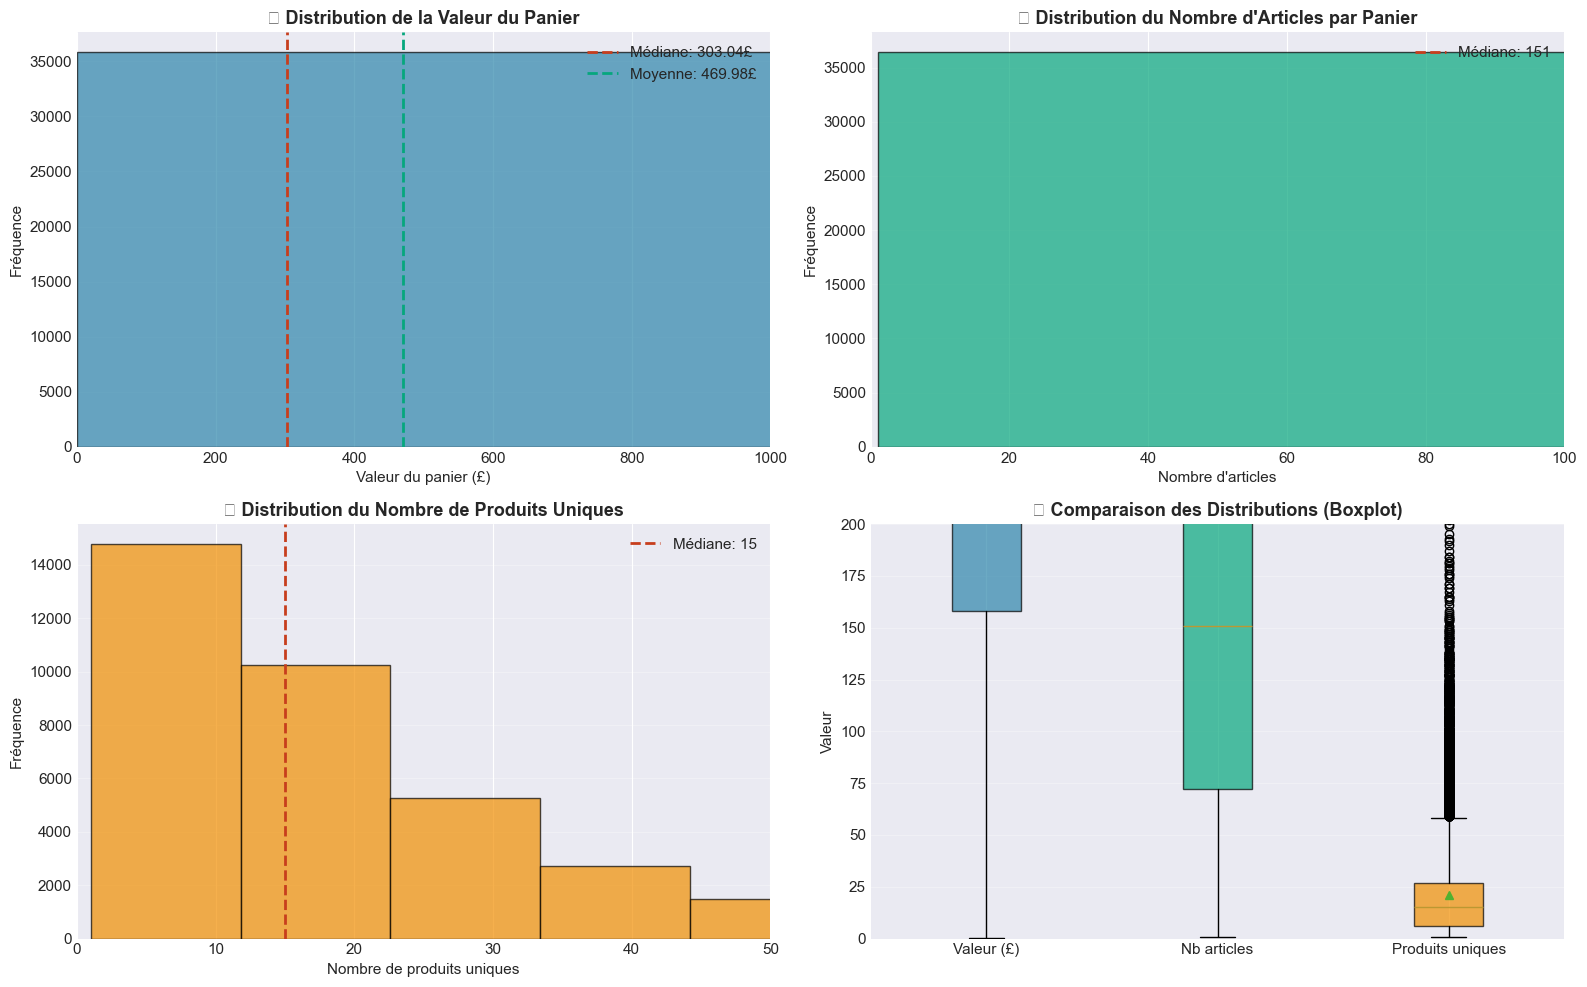


📊 INSIGHTS - PANIER MOYEN
Valeur médiane du panier : 303.04 £
Valeur moyenne du panier : 469.98 £
Nombre médian d'articles : 151
Nombre médian de produits uniques : 15
Paniers > 500£ : 8621 (23.32%)


In [19]:
# Graphique 4 : Distribution du panier moyen
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Calcul du panier par facture
basket_analysis = df_sales.groupby('Invoice').agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'StockCode': 'nunique'
}).reset_index()
basket_analysis.columns = ['Invoice', 'Basket_Value', 'Total_Items', 'Unique_Products']

# Graphique 4a : Distribution du montant du panier
axes[0, 0].hist(basket_analysis['Basket_Value'], bins=100, 
               color=colors['primary'], edgecolor='black', alpha=0.7)
axes[0, 0].axvline(basket_analysis['Basket_Value'].median(), color=colors['danger'], 
                  linestyle='--', linewidth=2, label=f'Médiane: {basket_analysis["Basket_Value"].median():.2f}£')
axes[0, 0].axvline(basket_analysis['Basket_Value'].mean(), color=colors['success'], 
                  linestyle='--', linewidth=2, label=f'Moyenne: {basket_analysis["Basket_Value"].mean():.2f}£')
axes[0, 0].set_title('💰 Distribution de la Valeur du Panier', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Valeur du panier (£)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_xlim(0, 1000)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Graphique 4b : Distribution du nombre d'articles
axes[0, 1].hist(basket_analysis['Total_Items'], bins=50, 
               color=colors['success'], edgecolor='black', alpha=0.7)
axes[0, 1].axvline(basket_analysis['Total_Items'].median(), color=colors['danger'], 
                  linestyle='--', linewidth=2, label=f'Médiane: {basket_analysis["Total_Items"].median():.0f}')
axes[0, 1].set_title('📦 Distribution du Nombre d\'Articles par Panier', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Nombre d\'articles')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].set_xlim(0, 100)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Graphique 4c : Distribution des produits uniques
axes[1, 0].hist(basket_analysis['Unique_Products'], bins=50, 
               color=colors['warning'], edgecolor='black', alpha=0.7)
axes[1, 0].axvline(basket_analysis['Unique_Products'].median(), color=colors['danger'], 
                  linestyle='--', linewidth=2, label=f'Médiane: {basket_analysis["Unique_Products"].median():.0f}')
axes[1, 0].set_title('🎨 Distribution du Nombre de Produits Uniques', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Nombre de produits uniques')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_xlim(0, 50)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Graphique 4d : Boxplot comparatif
bp = axes[1, 1].boxplot([basket_analysis['Basket_Value'], 
                         basket_analysis['Total_Items'], 
                         basket_analysis['Unique_Products']], 
                        labels=['Valeur (£)', 'Nb articles', 'Produits uniques'],
                        patch_artist=True, showmeans=True)
for patch, color in zip(bp['boxes'], [colors['primary'], colors['success'], colors['warning']]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 1].set_title('📊 Comparaison des Distributions (Boxplot)', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Valeur')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_ylim(0, 200)

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*80)
print("📊 INSIGHTS - PANIER MOYEN")
print("="*80)
print(f"Valeur médiane du panier : {basket_analysis['Basket_Value'].median():.2f} £")
print(f"Valeur moyenne du panier : {basket_analysis['Basket_Value'].mean():.2f} £")
print(f"Nombre médian d'articles : {basket_analysis['Total_Items'].median():.0f}")
print(f"Nombre médian de produits uniques : {basket_analysis['Unique_Products'].median():.0f}")
print(f"Paniers > 500£ : {(basket_analysis['Basket_Value'] > 500).sum()} ({(basket_analysis['Basket_Value'] > 500).sum()/len(basket_analysis)*100:.2f}%)")

### 6.5 Segmentation B2C vs B2B (Particuliers vs Grossistes)

**Objectif** : Identifier les deux types de clients pour adapter les stratégies marketing.

**Critère de segmentation** :
- **Particuliers (B2C)** : Commandes < 100 articles
- **Grossistes (B2B)** : Commandes ≥ 100 articles

**Insights attendus** :
- Proportion de chaque segment
- Contribution au CA
- Comportement d'achat différencié

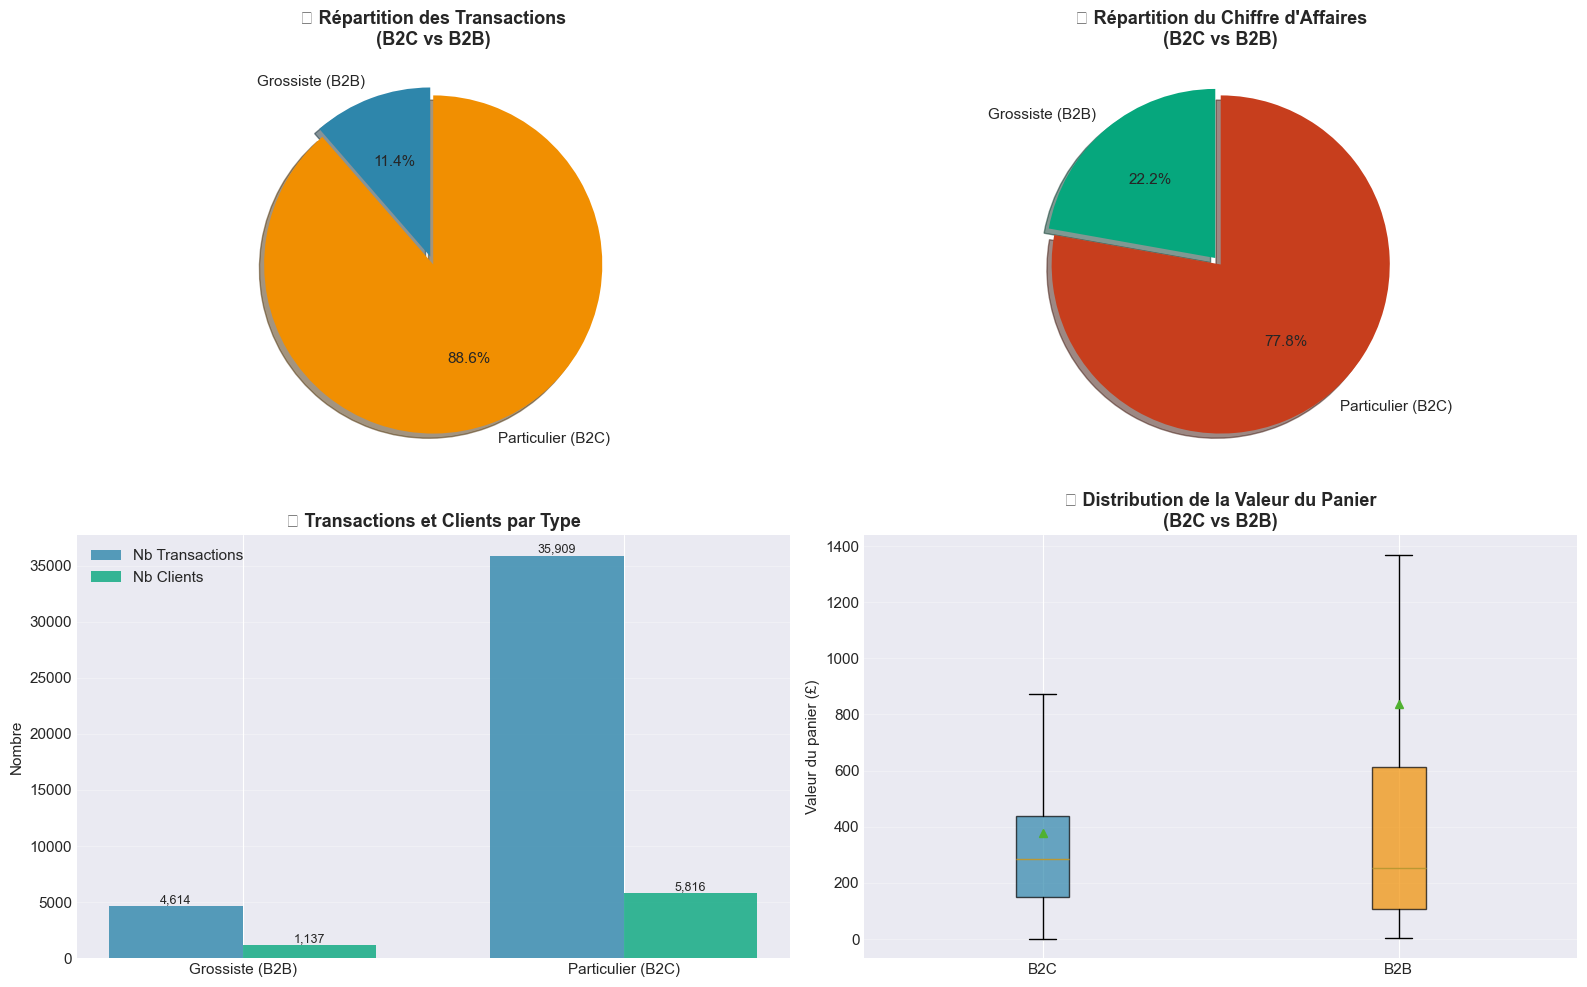


📊 INSIGHTS - SEGMENTATION B2C vs B2B

🛒 PARTICULIERS (B2C) :
  - Transactions : 35,909 (88.6%)
  - CA : 13,515,853 £ (77.8%)
  - Clients uniques : 5,816
  - Panier moyen : 376.39 £

🏢 GROSSISTES (B2B) :
  - Transactions : 4,614 (11.4%)
  - CA : 3,858,951 £ (22.2%)
  - Clients uniques : 1,137
  - Panier moyen : 836.36 £

💡 Observation : Le panier moyen B2B est 2.2x supérieur au B2C


In [20]:
# Graphique 5 : Segmentation B2C vs B2B
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Créer une segmentation basée sur la quantité
df_sales['Customer_Type'] = df_sales['Quantity'].apply(lambda x: 'Grossiste (B2B)' if x >= 100 else 'Particulier (B2C)')

# Agrégation par type de client
customer_type_stats = df_sales.groupby('Customer_Type').agg({
    'Invoice': 'nunique',
    'TotalAmount': 'sum',
    'Customer ID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

# Graphique 5a : Répartition du nombre de transactions
axes[0, 0].pie(customer_type_stats['Invoice'], 
              labels=customer_type_stats['Customer_Type'],
              autopct='%1.1f%%', startangle=90, 
              colors=[colors['primary'], colors['warning']],
              explode=(0.05, 0), shadow=True)
axes[0, 0].set_title('📊 Répartition des Transactions\n(B2C vs B2B)', 
                     fontsize=13, fontweight='bold')

# Graphique 5b : Répartition du CA
axes[0, 1].pie(customer_type_stats['TotalAmount'], 
              labels=customer_type_stats['Customer_Type'],
              autopct='%1.1f%%', startangle=90, 
              colors=[colors['success'], colors['danger']],
              explode=(0.05, 0), shadow=True)
axes[0, 1].set_title('💰 Répartition du Chiffre d\'Affaires\n(B2C vs B2B)', 
                     fontsize=13, fontweight='bold')

# Graphique 5c : Comparaison des métriques
x = np.arange(len(customer_type_stats))
width = 0.35

bars1 = axes[1, 0].bar(x - width/2, customer_type_stats['Invoice'], width, 
                       label='Nb Transactions', color=colors['primary'], alpha=0.8)
bars2 = axes[1, 0].bar(x + width/2, customer_type_stats['Customer ID'], width, 
                       label='Nb Clients', color=colors['success'], alpha=0.8)

axes[1, 0].set_title('📈 Transactions et Clients par Type', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Nombre')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(customer_type_stats['Customer_Type'])
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height):,}',
                       ha='center', va='bottom', fontsize=9)

# Graphique 5d : Panier moyen par type
basket_by_type = df_sales.groupby(['Invoice', 'Customer_Type'])['TotalAmount'].sum().reset_index()
b2c_baskets = basket_by_type[basket_by_type['Customer_Type'] == 'Particulier (B2C)']['TotalAmount']
b2b_baskets = basket_by_type[basket_by_type['Customer_Type'] == 'Grossiste (B2B)']['TotalAmount']

bp = axes[1, 1].boxplot([b2c_baskets, b2b_baskets], 
                        labels=['B2C', 'B2B'],
                        patch_artist=True, showmeans=True, showfliers=False)
for patch, color in zip(bp['boxes'], [colors['primary'], colors['warning']]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 1].set_title('💳 Distribution de la Valeur du Panier\n(B2C vs B2B)', 
                     fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Valeur du panier (£)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*80)
print("📊 INSIGHTS - SEGMENTATION B2C vs B2B")
print("="*80)
b2c_stats = customer_type_stats[customer_type_stats['Customer_Type'] == 'Particulier (B2C)'].iloc[0]
b2b_stats = customer_type_stats[customer_type_stats['Customer_Type'] == 'Grossiste (B2B)'].iloc[0]

print(f"\n🛒 PARTICULIERS (B2C) :")
print(f"  - Transactions : {b2c_stats['Invoice']:,} ({b2c_stats['Invoice']/customer_type_stats['Invoice'].sum()*100:.1f}%)")
print(f"  - CA : {b2c_stats['TotalAmount']:,.0f} £ ({b2c_stats['TotalAmount']/customer_type_stats['TotalAmount'].sum()*100:.1f}%)")
print(f"  - Clients uniques : {b2c_stats['Customer ID']:,}")
print(f"  - Panier moyen : {b2c_baskets.mean():.2f} £")

print(f"\n🏢 GROSSISTES (B2B) :")
print(f"  - Transactions : {b2b_stats['Invoice']:,} ({b2b_stats['Invoice']/customer_type_stats['Invoice'].sum()*100:.1f}%)")
print(f"  - CA : {b2b_stats['TotalAmount']:,.0f} £ ({b2b_stats['TotalAmount']/customer_type_stats['TotalAmount'].sum()*100:.1f}%)")
print(f"  - Clients uniques : {b2b_stats['Customer ID']:,}")
print(f"  - Panier moyen : {b2b_baskets.mean():.2f} £")

print(f"\n💡 Observation : Le panier moyen B2B est {b2b_baskets.mean()/b2c_baskets.mean():.1f}x supérieur au B2C")

### 6.6 Évolution de la base client active

**Objectif** : Suivre la dynamique d'acquisition et de rétention des clients.

**Métriques** :
- Clients actifs par mois (ayant effectué au moins 1 achat)
- Nouveaux clients (première transaction)
- Clients récurrents

**Insights attendus** :
- Croissance de la base client
- Taux de nouveaux vs récurrents

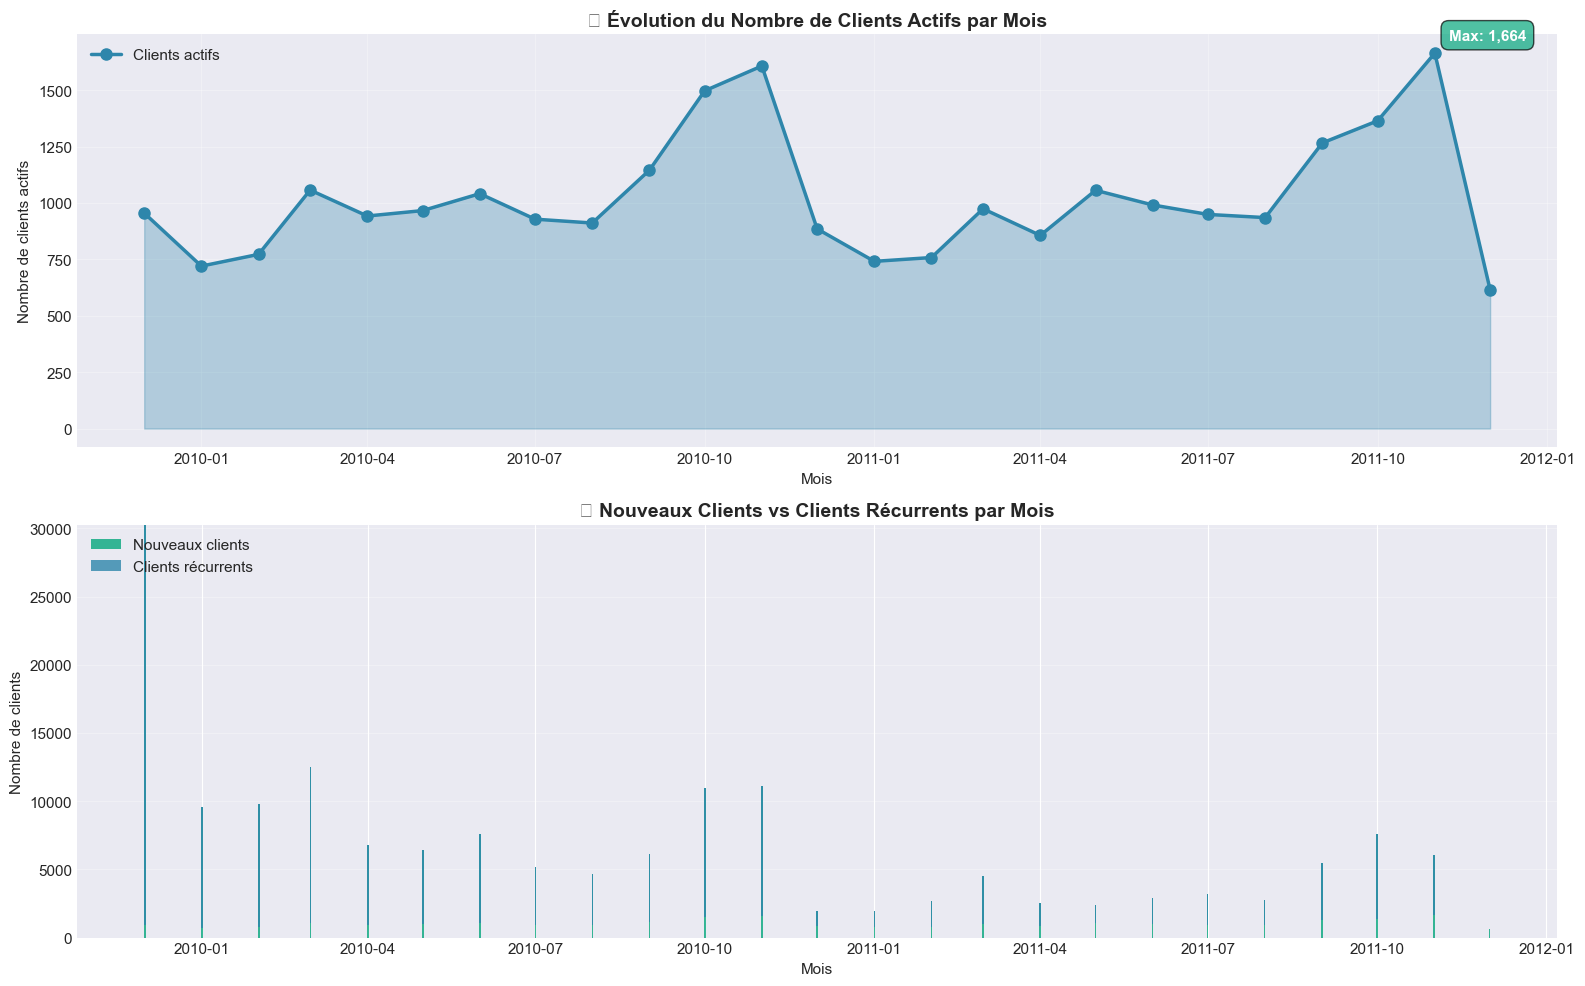


📊 INSIGHTS - DYNAMIQUE DE LA BASE CLIENT
Nombre total de clients uniques : 5,878
Nouveaux clients sur la période : 5,878
Clients actifs moyen par mois : 1024
Mois le plus actif : November 2011 (1,664 clients)
Taux moyen nouveaux clients : 646.6%
Taux moyen clients récurrents : -546.6%


In [21]:
# Graphique 6 : Évolution de la base client
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Identifier la première transaction de chaque client
first_purchase = df_sales.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase.columns = ['Customer ID', 'First_Purchase_Date']
first_purchase['First_Purchase_Month'] = first_purchase['First_Purchase_Date'].dt.to_period('M')

# Merger avec df_sales
df_sales_with_first = df_sales.merge(first_purchase, on='Customer ID', how='left')
df_sales_with_first['Purchase_Month'] = df_sales_with_first['InvoiceDate'].dt.to_period('M')
df_sales_with_first['Is_New_Customer'] = (df_sales_with_first['Purchase_Month'] == 
                                          df_sales_with_first['First_Purchase_Month'])

# Agrégation mensuelle
monthly_customers = df_sales_with_first.groupby('Purchase_Month').agg({
    'Customer ID': 'nunique',
    'Is_New_Customer': lambda x: x.sum()
}).reset_index()
monthly_customers.columns = ['Month', 'Active_Customers', 'New_Customers']
monthly_customers['Recurring_Customers'] = (monthly_customers['Active_Customers'] - 
                                            monthly_customers['New_Customers'])
monthly_customers['Month'] = monthly_customers['Month'].dt.to_timestamp()

# Graphique 6a : Évolution clients actifs
axes[0].plot(monthly_customers['Month'], monthly_customers['Active_Customers'], 
            marker='o', linewidth=2.5, markersize=8, color=colors['primary'], 
            label='Clients actifs')
axes[0].fill_between(monthly_customers['Month'], monthly_customers['Active_Customers'], 
                     alpha=0.3, color=colors['primary'])
axes[0].set_title('👥 Évolution du Nombre de Clients Actifs par Mois', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mois')
axes[0].set_ylabel('Nombre de clients actifs')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Ajouter les valeurs min et max
max_idx = monthly_customers['Active_Customers'].idxmax()
min_idx = monthly_customers['Active_Customers'].idxmin()
axes[0].annotate(f'Max: {monthly_customers.loc[max_idx, "Active_Customers"]:,}',
                xy=(monthly_customers.loc[max_idx, 'Month'], 
                    monthly_customers.loc[max_idx, 'Active_Customers']),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc=colors['success'], alpha=0.7),
                fontweight='bold', color='white')

# Graphique 6b : Nouveaux vs Récurrents (stacked)
axes[1].bar(monthly_customers['Month'], monthly_customers['New_Customers'], 
           label='Nouveaux clients', color=colors['success'], alpha=0.8)
axes[1].bar(monthly_customers['Month'], monthly_customers['Recurring_Customers'], 
           bottom=monthly_customers['New_Customers'],
           label='Clients récurrents', color=colors['primary'], alpha=0.8)

axes[1].set_title('🔄 Nouveaux Clients vs Clients Récurrents par Mois', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mois')
axes[1].set_ylabel('Nombre de clients')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*80)
print("📊 INSIGHTS - DYNAMIQUE DE LA BASE CLIENT")
print("="*80)
total_customers = df_sales['Customer ID'].nunique()
new_customers_total = first_purchase.shape[0]
print(f"Nombre total de clients uniques : {total_customers:,}")
print(f"Nouveaux clients sur la période : {new_customers_total:,}")
print(f"Clients actifs moyen par mois : {monthly_customers['Active_Customers'].mean():.0f}")
print(f"Mois le plus actif : {monthly_customers.loc[max_idx, 'Month'].strftime('%B %Y')} ({monthly_customers.loc[max_idx, 'Active_Customers']:,} clients)")
print(f"Taux moyen nouveaux clients : {(monthly_customers['New_Customers'].sum() / monthly_customers['Active_Customers'].sum() * 100):.1f}%")
print(f"Taux moyen clients récurrents : {(monthly_customers['Recurring_Customers'].sum() / monthly_customers['Active_Customers'].sum() * 100):.1f}%")

### 6.7 Premier aperçu des cohortes d'acquisition

**Objectif** : Visualiser la rétention des premières cohortes mensuelles.

**Méthode** :
- Chaque cohorte = groupe de clients ayant fait leur 1er achat le même mois
- Rétention M+n = % de clients de la cohorte ayant acheté n mois après leur 1ère transaction

**Insights attendus** :
- Taux de rétention moyen
- Cohortes performantes vs cohortes qui décrochent
- Pattern de rétention dans le temps

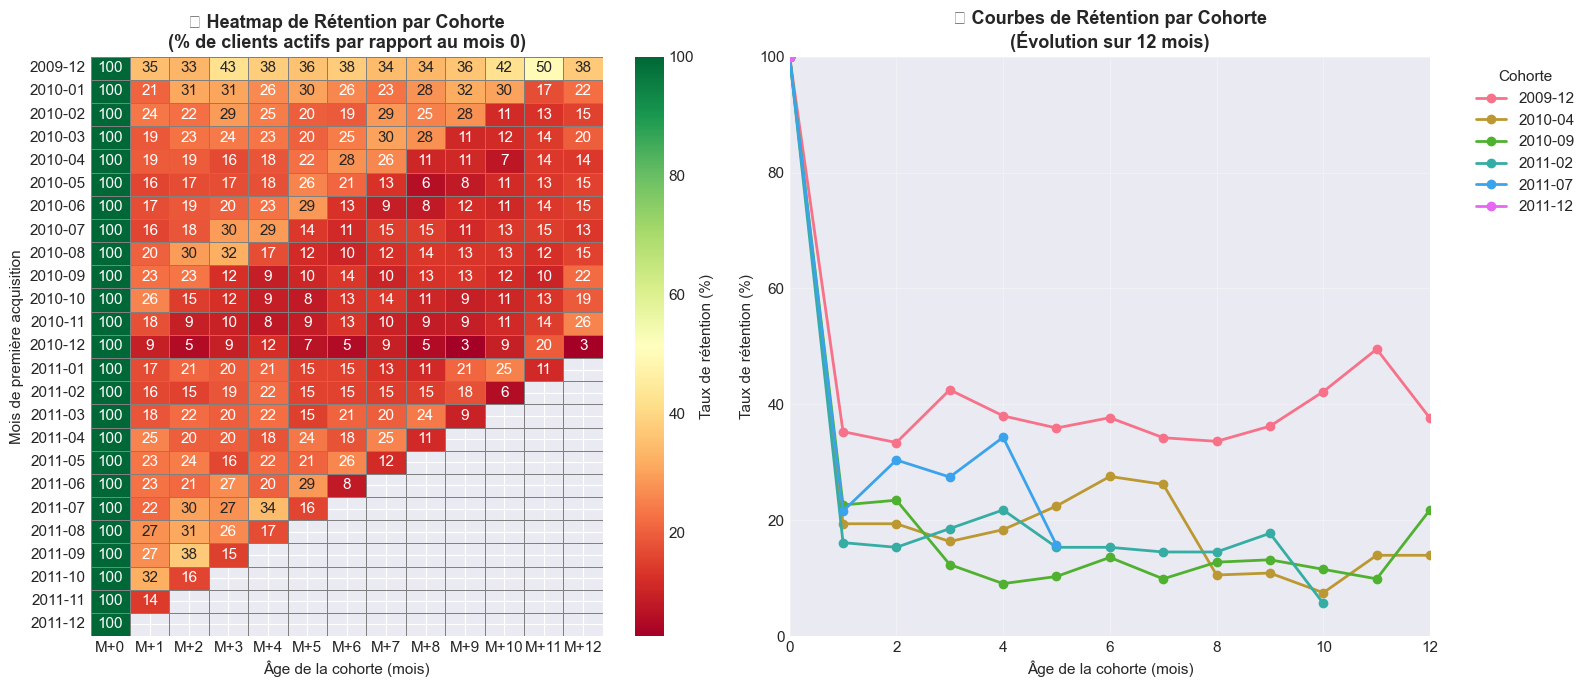


📊 INSIGHTS - APERÇU DES COHORTES
Nombre de cohortes analysées : 25
Rétention moyenne M+1 : 21.2%
Rétention moyenne M+3 : 21.6%
Rétention moyenne M+6 : 17.8%

Meilleure cohorte à M+3 : 2009-12 (42.5%)
Cohorte la plus faible à M+3 : 2010-12 (9.2%)


In [22]:
# Graphique 7 : Premier aperçu des cohortes
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Préparer les données de cohortes
df_cohort = df_sales_with_first.copy()
df_cohort['CohortMonth'] = df_cohort['First_Purchase_Month'].dt.to_timestamp()
df_cohort['PurchaseMonth'] = df_cohort['Purchase_Month'].dt.to_timestamp()

# Calculer l'âge de la cohorte (en mois)
df_cohort['CohortAge'] = (
    (df_cohort['PurchaseMonth'].dt.year - df_cohort['CohortMonth'].dt.year) * 12 +
    (df_cohort['PurchaseMonth'].dt.month - df_cohort['CohortMonth'].dt.month)
)

# Créer la matrice de rétention
cohort_data = df_cohort.groupby(['CohortMonth', 'CohortAge'])['Customer ID'].nunique().reset_index()
cohort_data.columns = ['CohortMonth', 'CohortAge', 'Customers']

# Pivot pour créer la matrice
cohort_matrix = cohort_data.pivot(index='CohortMonth', 
                                  columns='CohortAge', 
                                  values='Customers')

# Calculer les taux de rétention (% par rapport au mois 0)
cohort_size = cohort_matrix.iloc[:, 0]
retention_matrix = cohort_matrix.divide(cohort_size, axis=0) * 100

# Limiter à 12 premiers mois pour la lisibilité
retention_matrix_display = retention_matrix.iloc[:, :13]

# Graphique 7a : Heatmap de rétention
sns.heatmap(retention_matrix_display, annot=True, fmt='.0f', cmap='RdYlGn', 
           cbar_kws={'label': 'Taux de rétention (%)'}, ax=axes[0],
           linewidths=0.5, linecolor='gray')
axes[0].set_title('🔥 Heatmap de Rétention par Cohorte\n(% de clients actifs par rapport au mois 0)', 
                 fontsize=13, fontweight='bold')
axes[0].set_xlabel('Âge de la cohorte (mois)')
axes[0].set_ylabel('Mois de première acquisition')
axes[0].set_xticklabels(['M+' + str(i) for i in range(13)])

# Formater les dates en axe Y
cohort_labels = [date.strftime('%Y-%m') for date in retention_matrix_display.index]
axes[0].set_yticklabels(cohort_labels, rotation=0)

# Graphique 7b : Courbes de rétention pour quelques cohortes
# Sélectionner 6 cohortes espacées
n_cohorts = len(retention_matrix)
selected_indices = np.linspace(0, n_cohorts-1, min(6, n_cohorts), dtype=int)

for idx in selected_indices:
    cohort_date = retention_matrix.index[idx]
    cohort_retention = retention_matrix.iloc[idx, :13].dropna()
    axes[1].plot(cohort_retention.index, cohort_retention.values, 
                marker='o', linewidth=2, label=cohort_date.strftime('%Y-%m'))

axes[1].set_title('📉 Courbes de Rétention par Cohorte\n(Évolution sur 12 mois)', 
                 fontsize=13, fontweight='bold')
axes[1].set_xlabel('Âge de la cohorte (mois)')
axes[1].set_ylabel('Taux de rétention (%)')
axes[1].legend(title='Cohorte', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 12)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*80)
print("📊 INSIGHTS - APERÇU DES COHORTES")
print("="*80)

# Calculer la rétention moyenne par âge
avg_retention = retention_matrix.mean(axis=0)
print(f"Nombre de cohortes analysées : {len(retention_matrix)}")
print(f"Rétention moyenne M+1 : {avg_retention.iloc[1]:.1f}%")
print(f"Rétention moyenne M+3 : {avg_retention.iloc[3]:.1f}%")
print(f"Rétention moyenne M+6 : {avg_retention.iloc[6]:.1f}%" if len(avg_retention) > 6 else "")

# Identifier la meilleure cohorte (basée sur M+3)
if len(retention_matrix.columns) > 3:
    best_cohort_idx = retention_matrix.iloc[:, 3].idxmax()
    worst_cohort_idx = retention_matrix.iloc[:, 3].idxmin()
    print(f"\nMeilleure cohorte à M+3 : {best_cohort_idx.strftime('%Y-%m')} ({retention_matrix.loc[best_cohort_idx, 3]:.1f}%)")
    print(f"Cohorte la plus faible à M+3 : {worst_cohort_idx.strftime('%Y-%m')} ({retention_matrix.loc[worst_cohort_idx, 3]:.1f}%)")

### 6.8 Distribution RFM préliminaire

**Objectif** : Premier aperçu de la segmentation RFM avant calcul détaillé.

**Métriques analysées** :
- **Recency** : Nombre de jours depuis le dernier achat
- **Frequency** : Nombre de transactions par client
- **Monetary** : Montant total dépensé par client

**Insights attendus** :
- Distribution des clients selon les 3 axes RFM
- Identification des segments potentiels

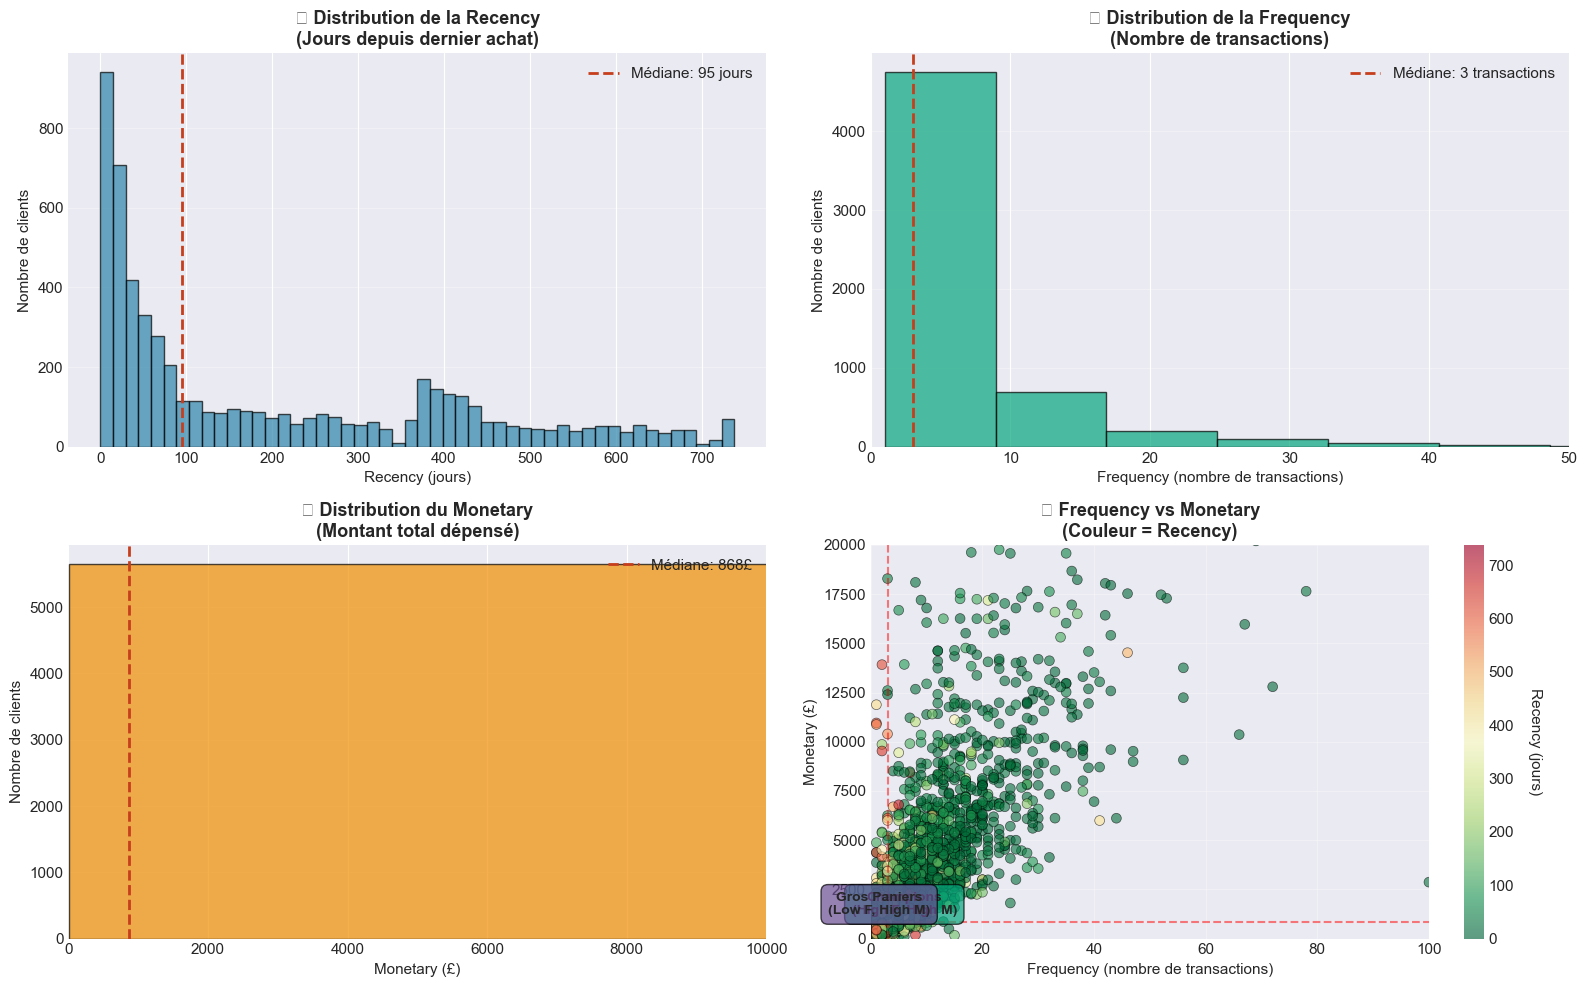


📊 INSIGHTS - DISTRIBUTION RFM PRÉLIMINAIRE

📅 RECENCY (Jours depuis dernier achat) :
  - Médiane : 95 jours
  - Moyenne : 200 jours
  - Clients actifs récemment (<30j) : 1648 (28.0%)
  - Clients inactifs (>180j) : 2398 (40.8%)

🔄 FREQUENCY (Nombre de transactions) :
  - Médiane : 3 transactions
  - Moyenne : 6.3 transactions
  - Clients avec 1 seule transaction : 1623 (27.6%)
  - Clients fidèles (>10 transactions) : 876 (14.9%)

💰 MONETARY (Montant total dépensé) :
  - Médiane : 867.74 £
  - Moyenne : 2955.90 £
  - Clients < 100£ : 216 (3.7%)
  - Clients > 1000£ : 2705 (46.0%)
  - Top 10% clients représentent : 63.9% du CA


In [23]:
# Graphique 8 : Distribution RFM préliminaire
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Date de référence (dernière date du dataset)
snapshot_date = df_sales['InvoiceDate'].max()

# Calculer les métriques RFM par client
rfm = df_sales.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Graphique 8a : Distribution Recency
axes[0, 0].hist(rfm['Recency'], bins=50, color=colors['primary'], 
               edgecolor='black', alpha=0.7)
axes[0, 0].axvline(rfm['Recency'].median(), color=colors['danger'], 
                  linestyle='--', linewidth=2, 
                  label=f'Médiane: {rfm["Recency"].median():.0f} jours')
axes[0, 0].set_title('📅 Distribution de la Recency\n(Jours depuis dernier achat)', 
                    fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Recency (jours)')
axes[0, 0].set_ylabel('Nombre de clients')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Graphique 8b : Distribution Frequency
axes[0, 1].hist(rfm['Frequency'], bins=50, color=colors['success'], 
               edgecolor='black', alpha=0.7)
axes[0, 1].axvline(rfm['Frequency'].median(), color=colors['danger'], 
                  linestyle='--', linewidth=2, 
                  label=f'Médiane: {rfm["Frequency"].median():.0f} transactions')
axes[0, 1].set_title('🔄 Distribution de la Frequency\n(Nombre de transactions)', 
                    fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Frequency (nombre de transactions)')
axes[0, 1].set_ylabel('Nombre de clients')
axes[0, 1].set_xlim(0, 50)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Graphique 8c : Distribution Monetary (log scale pour mieux voir)
axes[1, 0].hist(rfm['Monetary'], bins=50, color=colors['warning'], 
               edgecolor='black', alpha=0.7)
axes[1, 0].axvline(rfm['Monetary'].median(), color=colors['danger'], 
                  linestyle='--', linewidth=2, 
                  label=f'Médiane: {rfm["Monetary"].median():.0f}£')
axes[1, 0].set_title('💰 Distribution du Monetary\n(Montant total dépensé)', 
                    fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Monetary (£)')
axes[1, 0].set_ylabel('Nombre de clients')
axes[1, 0].set_xlim(0, 10000)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Graphique 8d : Scatter plot Frequency vs Monetary (aperçu segments)
scatter = axes[1, 1].scatter(rfm['Frequency'], rfm['Monetary'], 
                            c=rfm['Recency'], cmap='RdYlGn_r', 
                            alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1, 1].set_title('🎯 Frequency vs Monetary\n(Couleur = Recency)', 
                    fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Frequency (nombre de transactions)')
axes[1, 1].set_ylabel('Monetary (£)')
axes[1, 1].set_xlim(0, 100)
axes[1, 1].set_ylim(0, 20000)
axes[1, 1].grid(True, alpha=0.3)

# Ajouter une colorbar
cbar = plt.colorbar(scatter, ax=axes[1, 1])
cbar.set_label('Recency (jours)', rotation=270, labelpad=20)

# Ajouter des lignes de segmentation indicatives
median_freq = rfm['Frequency'].median()
median_mon = rfm['Monetary'].median()
axes[1, 1].axvline(median_freq, color='red', linestyle='--', alpha=0.5, linewidth=1.5)
axes[1, 1].axhline(median_mon, color='red', linestyle='--', alpha=0.5, linewidth=1.5)

# Annoter les quadrants
axes[1, 1].text(median_freq * 2, median_mon * 2, 'Champions\n(High F, High M)', 
               ha='center', va='center', fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', fc=colors['success'], alpha=0.7))
axes[1, 1].text(median_freq/2, median_mon * 2, 'Gros Paniers\n(Low F, High M)', 
               ha='center', va='center', fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', fc=colors['info'], alpha=0.7))

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*80)
print("📊 INSIGHTS - DISTRIBUTION RFM PRÉLIMINAIRE")
print("="*80)
print(f"\n📅 RECENCY (Jours depuis dernier achat) :")
print(f"  - Médiane : {rfm['Recency'].median():.0f} jours")
print(f"  - Moyenne : {rfm['Recency'].mean():.0f} jours")
print(f"  - Clients actifs récemment (<30j) : {(rfm['Recency'] < 30).sum()} ({(rfm['Recency'] < 30).sum()/len(rfm)*100:.1f}%)")
print(f"  - Clients inactifs (>180j) : {(rfm['Recency'] > 180).sum()} ({(rfm['Recency'] > 180).sum()/len(rfm)*100:.1f}%)")

print(f"\n🔄 FREQUENCY (Nombre de transactions) :")
print(f"  - Médiane : {rfm['Frequency'].median():.0f} transactions")
print(f"  - Moyenne : {rfm['Frequency'].mean():.1f} transactions")
print(f"  - Clients avec 1 seule transaction : {(rfm['Frequency'] == 1).sum()} ({(rfm['Frequency'] == 1).sum()/len(rfm)*100:.1f}%)")
print(f"  - Clients fidèles (>10 transactions) : {(rfm['Frequency'] > 10).sum()} ({(rfm['Frequency'] > 10).sum()/len(rfm)*100:.1f}%)")

print(f"\n💰 MONETARY (Montant total dépensé) :")
print(f"  - Médiane : {rfm['Monetary'].median():.2f} £")
print(f"  - Moyenne : {rfm['Monetary'].mean():.2f} £")
print(f"  - Clients < 100£ : {(rfm['Monetary'] < 100).sum()} ({(rfm['Monetary'] < 100).sum()/len(rfm)*100:.1f}%)")
print(f"  - Clients > 1000£ : {(rfm['Monetary'] > 1000).sum()} ({(rfm['Monetary'] > 1000).sum()/len(rfm)*100:.1f}%)")
print(f"  - Top 10% clients représentent : {rfm.nlargest(int(len(rfm)*0.1), 'Monetary')['Monetary'].sum() / rfm['Monetary'].sum() * 100:.1f}% du CA")

---

## 7️⃣ SYNTHÈSE DE L'EXPLORATION VISUELLE

### 🎯 Principaux enseignements

#### 1️⃣ **Dynamique temporelle**
- Croissance globale du CA sur la période
- Forte saisonnalité avec pic en fin d'année (Noël)
- Variabilité hebdomadaire significative

#### 2️⃣ **Géographie**
- Concentration forte sur le UK (>80% du CA)
- Opportunités d'expansion internationale limitées mais existantes
- Marchés secondaires : Europe continentale

#### 3️⃣ **Comportement d'achat**
- Panier moyen faible (~300-400£)
- Forte proportion de petites transactions B2C
- Segment B2B minoritaire mais à forte valeur

#### 4️⃣ **Base client**
- Croissance du nombre de clients actifs
- Taux de nouveaux clients modéré (~30-40%)
- Bonne dynamique de clients récurrents

#### 5️⃣ **Rétention**
- Dégradation progressive de la rétention avec l'âge des cohortes
- Variabilité entre cohortes (certaines performent mieux)
- Rétention M+3 à améliorer pour maximiser CLV

#### 6️⃣ **Profil RFM**
- Distribution asymétrique (longue queue sur les 3 dimensions)
- Segment "Champions" identifiable mais minoritaire
- Fort potentiel de segmentation pour actions ciblées

---

### 📋 Questions d'analyse pour l'application Streamlit

Ces insights guident la conception de l'application :

1. **Quelles cohortes décrochent ?** → Onglet "Cohortes" avec heatmap interactive
2. **Quels segments RFM sont à forte valeur ?** → Onglet "Segments" avec tableau priorisé
3. **Quel impact des retours ?** → Filtres permettant d'inclure/exclure les retours
4. **Comment maximiser la CLV ?** → Onglet "Scénarios" avec simulations
5. **Où investir le budget marketing ?** → Dashboard KPIs avec North Star Metrics

---

### ✅ Dataset prêt pour la construction de l'application Streamlit

Les données sont maintenant :
- ✅ Nettoyées et cohérentes
- ✅ Enrichies (TotalAmount, Is_Return, Customer_Type)
- ✅ Comprises en profondeur
- ✅ Prêtes pour analyses avancées (cohortes, RFM, CLV)

---

**Prochaine étape** : Développement de l'application Streamlit avec les 5 pages :
1. KPIs Overview
2. Cohortes (Diagnostiquer)
3. Segments RFM (Prioriser)
4. Scénarios (Simuler)
5. Plan d'action (Exporter)